Aproximación de la raíz: 2.0
Número de iteraciones realizadas: 0


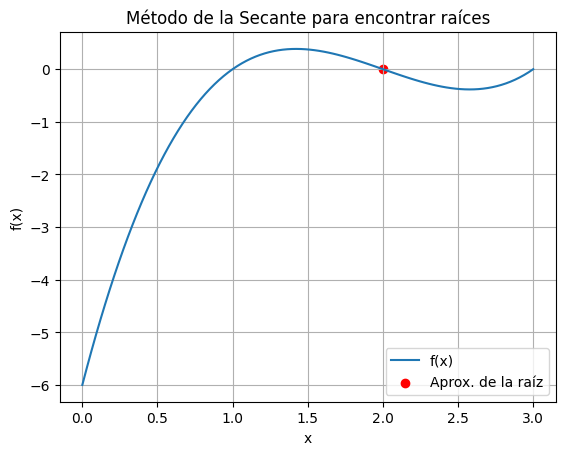

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

def secant_method(func, x0, x1, tol=1e-6, max_iter=100):
    """
    Método de la secante para encontrar una raíz de la ecuación.

    :param func: La función para la cual encontrar la raíz.
    :param x0: Primera aproximación inicial.
    :param x1: Segunda aproximación inicial.
    :param tol: Tolerancia para la convergencia.
    :param max_iter: Número máximo de iteraciones.
    :return: Aproximación de la raíz, número de iteraciones realizadas.
    """
    x = sp.symbols('x')
    func_lambdified = sp.lambdify(x, func, 'numpy')

    x_n_minus_1 = x0
    x_n = x1
    iter_count = 0

    while abs(func_lambdified(x_n)) > tol and iter_count < max_iter:
        x_n_plus_1 = x_n - func_lambdified(x_n) * (x_n - x_n_minus_1) / (func_lambdified(x_n) - func_lambdified(x_n_minus_1))
        x_n_minus_1 = x_n
        x_n = x_n_plus_1
        iter_count += 1

    return x_n, iter_count

# Ejemplo de uso:
if __name__ == "__main__":
    # Definir la función y las aproximaciones iniciales
    x = sp.symbols('x')
    func = x**3 - 6*x**2 + 11*x - 6
    initial_approximation_1 = 1.0
    initial_approximation_2 = 2.0

    # Aplicar el método de la secante
    root, iterations = secant_method(func, initial_approximation_1, initial_approximation_2)

    # Mostrar resultados
    print(f"Aproximación de la raíz: {root}")
    print(f"Número de iteraciones realizadas: {iterations}")

    # Crear gráfico de la función y la raíz encontrada
    x_values = np.linspace(0, 3, 100)
    func_values = x_values**3 - 6*x_values**2 + 11*x_values - 6

    plt.plot(x_values, func_values, label="f(x)")
    plt.scatter(root, 0, color='red', label='Aprox. de la raíz')
    plt.title("Método de la Secante para encontrar raíces")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()
